In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

sys.path.append("..")

import pandas as pd
import numpy as np

In [2]:
import re
from scipy.stats import entropy

df = pd.read_csv("../contrastes/provincias.csv", quotechar="\"", decimal=",")
df = df.set_index("palabra")


fnorm_vars = [c for c in df.columns if re.match(r'fnorm_.*', c)]
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]


In [3]:
from iv_helpers import simulated_shuffled_entropy

fn = lambda ws: simulated_shuffled_entropy(ws, 23)

df["entropy"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["shuffled_entropy"] = df.cantPalabra.apply(fn)

In [4]:
df["information_value"] = df.cantPalabra * (df.shuffled_entropy - df.entropy)

In [5]:

df.sort_values(by="information_value", ascending=False, inplace=True)

In [7]:

df[df.columns.difference(cant_palabras+fnorm_vars)].to_csv("information_value.csv")

In [8]:
df.columns

Index([u'buenosairesPalabras', u'catamarcaPalabras', u'chacoPalabras',
       u'chubutPalabras', u'cordobaPalabras', u'corrientesPalabras',
       u'entreriosPalabras', u'formosaPalabras', u'jujuyPalabras',
       u'lapampaPalabras', u'lariojaPalabras', u'mendozaPalabras',
       u'misionesPalabras', u'neuquenPalabras', u'rionegroPalabras',
       u'saltaPalabras', u'sanjuanPalabras', u'sanluisPalabras',
       u'santacruzPalabras', u'santafePalabras', u'santiagoPalabras',
       u'tierradelfuegoPalabras', u'tucumanPalabras', u'cantPalabra',
       u'buenosairesPalabrasPersonas', u'catamarcaPalabrasPersonas',
       u'chacoPalabrasPersonas', u'chubutPalabrasPersonas',
       u'cordobaPalabrasPersonas', u'corrientesPalabrasPersonas',
       u'entreriosPalabrasPersonas', u'formosaPalabrasPersonas',
       u'jujuyPalabrasPersonas', u'lapampaPalabrasPersonas',
       u'lariojaPalabrasPersonas', u'mendozaPalabrasPersonas',
       u'misionesPalabrasPersonas', u'neuquenPalabrasPersonas',
    

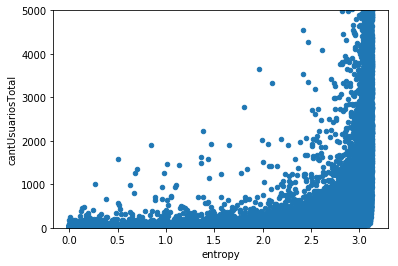

In [12]:
df.plot.scatter(x="entropy", y="cantUsuariosTotal", ylim=[0, 5000])

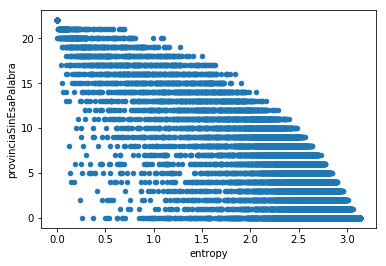

In [13]:
df.plot.scatter(x="entropy", y="provinciaSinEsaPalabra")

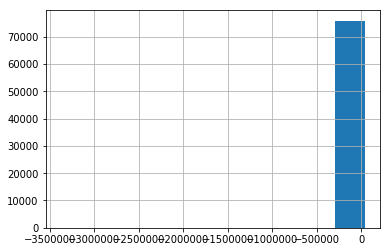

In [17]:
df.information_value.hist()